# PBF X CADÚnico

## I. Bases de dados
PBF set 2023 e CADUNICO ago 2023 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import os
import requests
import plotly.io as pio
import math
from geojson_rewind import rewind
import json
import requests, urllib3, ssl

pio.renderers.default = 'iframe'

### 1. PBF 2023

In [110]:
url_pbf = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial/?fq=anomes_s:2023*&fl=codigo_ibge%2Canomes_s%2Cqtd_familias_beneficiarias_bolsa_familia_s%2Cvalor_repassado_bolsa_familia_s%2Cpbf_vlr_medio_benef_f&fq=valor_repassado_bolsa_familia_s%3A*&q=*%3A*&rows=100000&sort=anomes_s%20desc%2C%20codigo_ibge%20asc&wt=csv'
pd_pbf_2023 = pd.read_csv(url_pbf, sep = ",")
pd_pbf_2023.rename(columns={'codigo_ibge': 'ibge_6'}, inplace=True)

In [111]:
pd_pbf_2023.head()

,ibge_6,anomes_s,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f
0,110001,202310,1765,1213683.0,687.64
1,110002,202310,6573,4535509.0,690.02
2,110003,202310,319,212850.0,669.34
3,110004,202310,5968,4118652.0,690.12
4,110005,202310,1112,809881.0,728.31


#### 1a) PBF set 2023

In [112]:
pd_pbf_2023['anomes_s'].unique()
pd_pbf_set23 = pd_pbf_2023[pd_pbf_2023['anomes_s'] == 202309]
pd_pbf_set23.shape

(5570, 5)

In [113]:
pd_pbf_set23.columns

Index(['ibge_6', 'anomes_s', 'qtd_familias_beneficiarias_bolsa_familia_s',
       'valor_repassado_bolsa_familia_s', 'pbf_vlr_medio_benef_f'],
      dtype='object')

In [114]:
pd_pbf_set23.describe()

,ibge_6,anomes_s,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f
count,5570.000000,5570.0,5570.000000,5.570000e+03,5570.000000
mean,325358.627828,202309.0,3856.147935,2.618194e+06,686.351321
std,98491.033878,0.0,16968.597271,1.145936e+07,28.937782
min,110001.000000,202309.0,6.000000,4.125000e+03,497.730000
25%,251212.500000,202309.0,520.250000,3.533988e+05,669.430000
50%,314627.500000,202309.0,1358.500000,9.281800e+05,682.655000
75%,411918.750000,202309.0,3395.750000,2.319366e+06,698.105000
max,530010.000000,202309.0,752313.000000,5.109573e+08,970.140000


### 2. CADÚnico 2023

In [116]:
url_cad_2023 = 'https://aplicacoes.mds.gov.br/sagi/servicos/misocial?fq=anomes_s:2023*&wt=csv&omitHeader=true&fq=cadunico_tot_fam_i:{0%20TO%20*]&q=*&fl=ibge:codigo_ibge,anomes:anomes_s,cadunico_tot_fam:cadunico_tot_fam_i,cadunico_tot_pes:cadunico_tot_pes_i,cadunico_tot_fam_rpc_ate_meio_sm:cadunico_tot_fam_rpc_ate_meio_sm_i,cadunico_tot_pes_rpc_ate_meio_sm:cadunico_tot_pes_rpc_ate_meio_sm_i,cadunico_tot_fam_pob:cadunico_tot_fam_pob_i,cadunico_tot_pes_pob:cadunico_tot_pes_pob_i,cadunico_tot_fam_ext_pob:cadunico_tot_fam_ext_pob_i,cadunico_tot_pes_ext_pob:cadunico_tot_pes_ext_pob_i,cadunico_tot_fam_pob_e_ext_pob:cadunico_tot_fam_pob_e_ext_pob_i,cadunico_tot_pes_pob_e_ext_pob:cadunico_tot_pes_pob_e_ext_pob_i&rows=100000000&sort=anomes_s%20desc,%20codigo_ibge%20asc'
pd_cadunico_2023 = pd.read_csv(url_cad_2023, sep = ",")
pd_cadunico_2023.rename(columns={'ibge': 'ibge_6'}, inplace=True)
pd_cadunico_2023.head()


,ibge_6,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,202308,4863,12536,2916,8712,753,2403,794,2176,1547,4579
1,110002,202308,18435,43034,11545,30454,2826,7904,3326,8153,6152,16057
2,110003,202308,933,2529,596,1807,159,493,112,310,271,803
3,110004,202308,18058,42056,10222,27382,2302,6428,3467,8541,5769,14969
4,110005,202308,3136,7653,1876,5311,531,1524,554,1557,1085,3081


#### 2a) CadÚnico ago 2023

In [117]:
#pd_cadunico_2023['anomes'].unique()
pd_cadu_ago23 = pd_cadunico_2023[pd_cadunico_2023['anomes'] == 202308]
pd_cadu_ago23.shape

(5570, 12)

In [118]:
pd_cadu_ago23.head()

,ibge_6,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
0,110001,202308,4863,12536,2916,8712,753,2403,794,2176,1547,4579
1,110002,202308,18435,43034,11545,30454,2826,7904,3326,8153,6152,16057
2,110003,202308,933,2529,596,1807,159,493,112,310,271,803
3,110004,202308,18058,42056,10222,27382,2302,6428,3467,8541,5769,14969
4,110005,202308,3136,7653,1876,5311,531,1524,554,1557,1085,3081


In [119]:
pd_cadu_ago23.columns

Index(['ibge_6', 'anomes', 'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob'],
      dtype='object')

In [120]:
pd_cadu_ago23.describe()

,ibge_6,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob
count,5570.000000,5570.0,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5570.000000,5570.000000,5570.000000,5.570000e+03,5570.000000,5.570000e+03
mean,325358.627828,202308.0,7.687290e+03,1.726919e+04,5.500938e+03,1.342370e+04,664.597127,1734.261221,3476.244704,7.934391e+03,4140.841831,9.668652e+03
std,98491.033878,0.0,3.618983e+04,7.710320e+04,2.535108e+04,5.700553e+04,3412.697478,8392.476936,16167.518908,3.318053e+04,19263.197401,4.079842e+04
min,110001.000000,202308.0,3.700000e+01,9.200000e+01,2.200000e+01,5.700000e+01,1.000000,1.000000,0.000000,0.000000e+00,3.000000,9.000000e+00
25%,251212.500000,202308.0,1.292250e+03,3.041500e+03,8.290000e+02,2.175250e+03,78.000000,226.000000,363.250000,8.682500e+02,526.000000,1.311000e+03
50%,314627.500000,202308.0,2.825000e+03,6.615500e+03,1.943500e+03,5.009000e+03,183.000000,511.000000,1091.000000,2.595000e+03,1382.500000,3.407000e+03
75%,411918.750000,202308.0,6.281750e+03,1.463475e+04,4.536750e+03,1.170575e+04,463.750000,1267.250000,2984.750000,7.241750e+03,3471.500000,8.556250e+03
max,530010.000000,202308.0,1.842573e+06,4.129005e+06,1.155211e+06,2.748069e+06,171399.000000,442307.000000,634135.000000,1.350343e+06,805534.000000,1.792650e+06


## II. Proporção de famílias necessitadas atendidas 
EM cada município, quantas famílias  
Famílias PBF/ Famílias bx e extrema pobreza CAdÚnico

### 1. Criando base única
Juntamos:
- Pograma Bolsa Família setembro/2023
- Cadastro Único agosto/2023
- Base municipal IBGE

In [123]:
# Chamando informações municipais
cd_municipio = pd.read_json('data/municipios_codigos.json')
cd_municipio['ibge_6'] = ((cd_municipio['id'].astype(str)).str[:6]).astype(int)
cd_municipio.rename(columns={'id': 'ibge_7'}, inplace=True)
cd_municipio.head(10)

,ibge_7,city,ibge_6
0,1100015,Alta Floresta D''Oeste,110001
1,1100379,Alto Alegre dos Parecis,110037
2,1100403,Alto Paraíso,110040
3,1100346,Alvorada D''Oeste,110034
4,1100023,Ariquemes,110002
5,1100452,Buritis,110045
6,1100031,Cabixi,110003
7,1100601,Cacaulândia,110060
8,1100049,Cacoal,110004
9,1100700,Campo Novo de Rondônia,110070


In [124]:
# MESCLANDO as Bases e adicionando informações municipais
pd_pbf_cadUnico_total = pd.merge(pd_pbf_set23, pd_cadu_ago23, left_on = ['ibge_6'], 
         right_on=['ibge_6'], how = 'outer')
pd_pbf_cadUnico_total = pd.merge(pd_pbf_cadUnico_total, cd_municipio, left_on = ['ibge_6'], 
         right_on=['ibge_6'], how = 'outer')

In [125]:
pd_pbf_cadUnico_total.shape

(5570, 18)

In [126]:
pd_pbf_cadUnico_total.head()

,ibge_6,anomes_s,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob,ibge_7,city
0,110001,202309,1755,1210767.0,689.90,202308,4863,12536,2916,8712,753,2403,794,2176,1547,4579,1100015,Alta Floresta D''Oeste
1,110002,202309,6398,4405009.0,688.61,202308,18435,43034,11545,30454,2826,7904,3326,8153,6152,16057,1100023,Ariquemes
2,110003,202309,318,211170.0,668.26,202308,933,2529,596,1807,159,493,112,310,271,803,1100031,Cabixi
3,110004,202309,5904,4068418.0,689.21,202308,18058,42056,10222,27382,2302,6428,3467,8541,5769,14969,1100049,Cacoal
4,110005,202309,1085,785131.0,723.62,202308,3136,7653,1876,5311,531,1524,554,1557,1085,3081,1100056,Cerejeiras


In [127]:
pd_pbf_cadUnico_total.columns

Index(['ibge_6', 'anomes_s', 'qtd_familias_beneficiarias_bolsa_familia_s',
       'valor_repassado_bolsa_familia_s', 'pbf_vlr_medio_benef_f', 'anomes',
       'cadunico_tot_fam', 'cadunico_tot_pes',
       'cadunico_tot_fam_rpc_ate_meio_sm', 'cadunico_tot_pes_rpc_ate_meio_sm',
       'cadunico_tot_fam_pob', 'cadunico_tot_pes_pob',
       'cadunico_tot_fam_ext_pob', 'cadunico_tot_pes_ext_pob',
       'cadunico_tot_fam_pob_e_ext_pob', 'cadunico_tot_pes_pob_e_ext_pob',
       'ibge_7', 'city'],
      dtype='object')

In [128]:
pd_pbf_cadUnico_total.describe()

,ibge_6,anomes_s,qtd_familias_beneficiarias_bolsa_familia_s,valor_repassado_bolsa_familia_s,pbf_vlr_medio_benef_f,anomes,cadunico_tot_fam,cadunico_tot_pes,cadunico_tot_fam_rpc_ate_meio_sm,cadunico_tot_pes_rpc_ate_meio_sm,cadunico_tot_fam_pob,cadunico_tot_pes_pob,cadunico_tot_fam_ext_pob,cadunico_tot_pes_ext_pob,cadunico_tot_fam_pob_e_ext_pob,cadunico_tot_pes_pob_e_ext_pob,ibge_7
count,5570.000000,5570.0,5570.000000,5.570000e+03,5570.000000,5570.0,5.570000e+03,5.570000e+03,5.570000e+03,5.570000e+03,5570.000000,5570.000000,5570.000000,5.570000e+03,5570.000000,5.570000e+03,5.570000e+03
mean,325358.627828,202309.0,3856.147935,2.618194e+06,686.351321,202308.0,7.687290e+03,1.726919e+04,5.500938e+03,1.342370e+04,664.597127,1734.261221,3476.244704,7.934391e+03,4140.841831,9.668652e+03,3.253591e+06
std,98491.033878,0.0,16968.597271,1.145936e+07,28.937782,0.0,3.618983e+04,7.710320e+04,2.535108e+04,5.700553e+04,3412.697478,8392.476936,16167.518908,3.318053e+04,19263.197401,4.079842e+04,9.849103e+05
min,110001.000000,202309.0,6.000000,4.125000e+03,497.730000,202308.0,3.700000e+01,9.200000e+01,2.200000e+01,5.700000e+01,1.000000,1.000000,0.000000,0.000000e+00,3.000000,9.000000e+00,1.100015e+06
25%,251212.500000,202309.0,520.250000,3.533988e+05,669.430000,202308.0,1.292250e+03,3.041500e+03,8.290000e+02,2.175250e+03,78.000000,226.000000,363.250000,8.682500e+02,526.000000,1.311000e+03,2.512126e+06
50%,314627.500000,202309.0,1358.500000,9.281800e+05,682.655000,202308.0,2.825000e+03,6.615500e+03,1.943500e+03,5.009000e+03,183.000000,511.000000,1091.000000,2.595000e+03,1382.500000,3.407000e+03,3.146280e+06
75%,411918.750000,202309.0,3395.750000,2.319366e+06,698.105000,202308.0,6.281750e+03,1.463475e+04,4.536750e+03,1.170575e+04,463.750000,1267.250000,2984.750000,7.241750e+03,3471.500000,8.556250e+03,4.119190e+06
max,530010.000000,202309.0,752313.000000,5.109573e+08,970.140000,202308.0,1.842573e+06,4.129005e+06,1.155211e+06,2.748069e+06,171399.000000,442307.000000,634135.000000,1.350343e+06,805534.000000,1.792650e+06,5.300108e+06


In [129]:
pd_pbf_cadUnico = pd_pbf_cadUnico_total.drop(columns = ['anomes_s', 'pbf_vlr_medio_benef_f', 'anomes', 'cadunico_tot_pes', 'cadunico_tot_pes_rpc_ate_meio_sm',
                                                        'cadunico_tot_pes_pob', 'cadunico_tot_pes_ext_pob','cadunico_tot_pes_pob_e_ext_pob'])


pd_pbf_cadUnico = pd_pbf_cadUnico.rename(columns = {'qtd_familias_beneficiarias_bolsa_familia_s': 'qtd_fam_beneficiadas', 
                                         'valor_repassado_bolsa_familia_s': 'valor_repassado_bf', 'cadunico_tot_fam_rpc_ate_meio_sm': 'cadunico_fam_rpc_ate_meio_sm', 
                                         'cadunico_tot_fam_pob': 'cadunico_fam_pob', 'cadunico_tot_fam_ext_pob': 'cadunico_fam_ext_pob', 
                                         'cadunico_tot_fam_pob_e_ext_pob': 'cadunico_fam_pob_e_ext_pob'})

pd_pbf_cadUnico.columns


Index(['ibge_6', 'qtd_fam_beneficiadas', 'valor_repassado_bf',
       'cadunico_tot_fam', 'cadunico_fam_rpc_ate_meio_sm', 'cadunico_fam_pob',
       'cadunico_fam_ext_pob', 'cadunico_fam_pob_e_ext_pob', 'ibge_7', 'city'],
      dtype='object')

In [130]:
pd_pbf_cadUnico['pbf_cadUnico_pob_ep'] = pd_pbf_cadUnico['qtd_fam_beneficiadas'] / pd_pbf_cadUnico['cadunico_fam_pob_e_ext_pob'] * 100
pd_pbf_cadUnico['pbf_cadUnico_tot'] = pd_pbf_cadUnico['qtd_fam_beneficiadas'] / pd_pbf_cadUnico['cadunico_fam_rpc_ate_meio_sm'] * 100
pd_pbf_cadUnico.head()

,ibge_6,qtd_fam_beneficiadas,valor_repassado_bf,cadunico_tot_fam,cadunico_fam_rpc_ate_meio_sm,cadunico_fam_pob,cadunico_fam_ext_pob,cadunico_fam_pob_e_ext_pob,ibge_7,city,pbf_cadUnico_pob_ep,pbf_cadUnico_tot
0,110001,1755,1210767.0,4863,2916,753,794,1547,1100015,Alta Floresta D''Oeste,113.445378,60.185185
1,110002,6398,4405009.0,18435,11545,2826,3326,6152,1100023,Ariquemes,103.998700,55.417930
2,110003,318,211170.0,933,596,159,112,271,1100031,Cabixi,117.343173,53.355705
3,110004,5904,4068418.0,18058,10222,2302,3467,5769,1100049,Cacoal,102.340094,57.757777
4,110005,1085,785131.0,3136,1876,531,554,1085,1100056,Cerejeiras,100.000000,57.835821


In [131]:
pd_pbf_cadUnico.describe()

,ibge_6,qtd_fam_beneficiadas,valor_repassado_bf,cadunico_tot_fam,cadunico_fam_rpc_ate_meio_sm,cadunico_fam_pob,cadunico_fam_ext_pob,cadunico_fam_pob_e_ext_pob,ibge_7,pbf_cadUnico_pob_ep,pbf_cadUnico_tot
count,5570.000000,5570.000000,5.570000e+03,5.570000e+03,5.570000e+03,5570.000000,5570.000000,5570.000000,5.570000e+03,5570.000000,5570.000000
mean,325358.627828,3856.147935,2.618194e+06,7.687290e+03,5.500938e+03,664.597127,3476.244704,4140.841831,3.253591e+06,98.841609,68.288749
std,98491.033878,16968.597271,1.145936e+07,3.618983e+04,2.535108e+04,3412.697478,16167.518908,19263.197401,9.849103e+05,9.987958,12.562562
min,110001.000000,6.000000,4.125000e+03,3.700000e+01,2.200000e+01,1.000000,0.000000,3.000000,1.100015e+06,42.310757,11.666667
25%,251212.500000,520.250000,3.533988e+05,1.292250e+03,8.290000e+02,78.000000,363.250000,526.000000,2.512126e+06,93.724438,59.576283
50%,314627.500000,1358.500000,9.281800e+05,2.825000e+03,1.943500e+03,183.000000,1091.000000,1382.500000,3.146280e+06,98.595738,68.963711
75%,411918.750000,3395.750000,2.319366e+06,6.281750e+03,4.536750e+03,463.750000,2984.750000,3471.500000,4.119190e+06,103.299707,78.684953
max,530010.000000,752313.000000,5.109573e+08,1.842573e+06,1.155211e+06,171399.000000,634135.000000,805534.000000,5.300108e+06,366.666667,94.142094


### 2. Limpando e Visualizando os Dados 
- Identificar outliers e limpar
- Visualizar

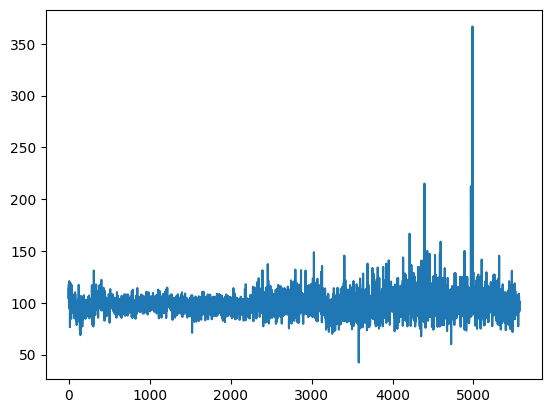

In [132]:
plt.plot(pd_pbf_cadUnico['pbf_cadUnico_pob_ep'])

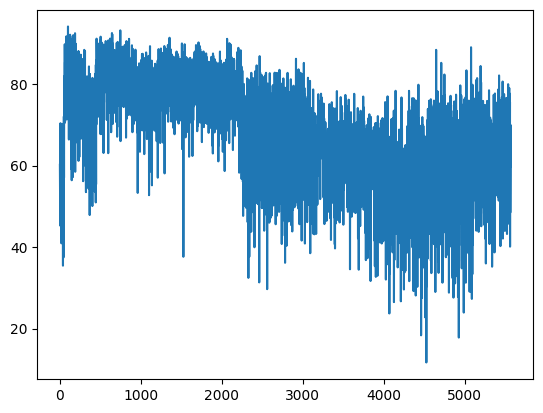

In [133]:
plt.plot(pd_pbf_cadUnico['pbf_cadUnico_tot'])

<Axes: >

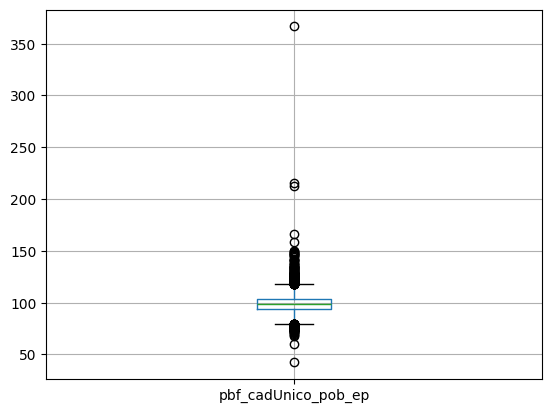

In [134]:
pd_pbf_cadUnico[['pbf_cadUnico_pob_ep']].boxplot()

In [135]:
indice_max = pd_pbf_cadUnico['pbf_cadUnico_pob_ep'].idxmax()
linha_max = pd_pbf_cadUnico.loc[indice_max]
linha_max

ibge_6                                       431805
qtd_fam_beneficiadas                             11
valor_repassado_bf                           5475.0
cadunico_tot_fam                                314
cadunico_fam_rpc_ate_meio_sm                     46
cadunico_fam_pob                                  3
cadunico_fam_ext_pob                              0
cadunico_fam_pob_e_ext_pob                        3
ibge_7                                      4318051
city                            São Domingos do Sul
pbf_cadUnico_pob_ep                      366.666667
pbf_cadUnico_tot                          23.913043
Name: 4988, dtype: object

In [136]:
maiores_valores = pd_pbf_cadUnico['pbf_cadUnico_pob_ep'].nlargest(10)
menores_valores = pd_pbf_cadUnico['pbf_cadUnico_pob_ep'].nsmallest(10)

In [137]:
maiores_valores

4988    366.666667
4395    215.000000
4968    212.500000
4211    166.666667
4594    158.928571
4429    150.000000
4889    150.000000
3029    148.742138
4411    147.540984
4585    147.435897
Name: pbf_cadUnico_pob_ep, dtype: float64

In [138]:
menores_valores

3583    42.310757
4724    60.000000
4354    67.582418
146     68.718210
3255    69.927348
1525    70.967742
5482    71.731449
3214    71.845560
3272    71.980676
4026    72.463768
Name: pbf_cadUnico_pob_ep, dtype: float64

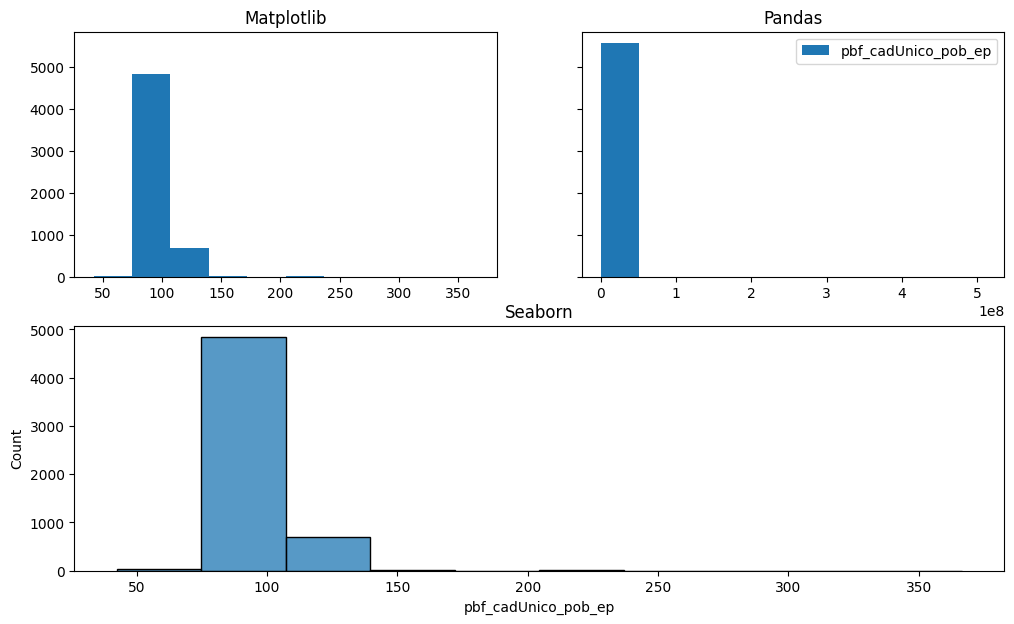

In [139]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Matplotlib')
ax1.hist(x=pd_pbf_cadUnico['pbf_cadUnico_pob_ep'], bins=10);

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
ax2.set_title('Pandas')
pd_pbf_cadUnico.plot.hist(column='pbf_cadUnico_pob_ep', bins=10, ax=ax2);

ax3 = plt.subplot(2, 1, 2)
plt.title('Seaborn')

sns.histplot(data=pd_pbf_cadUnico, x='pbf_cadUnico_pob_ep', 
             multiple='stack', bins=10, ax=ax3);
             
# sns.histplot(data=pd_pbf_cadUnico, x='pbf_cadUnico_pob_ep', hue='Data', 
#             multiple='stack', bins=10, ax=ax3);

#### 2a) Removendo outliers

In [140]:
retira_maiores_outliers = pd_pbf_cadUnico['pbf_cadUnico_pob_ep'] < 200
pd_pbf_cadUnico_semout_mai = pd_pbf_cadUnico[retira_maiores_outliers] 

retira_menores_outliers = pd_pbf_cadUnico_semout_mai['pbf_cadUnico_pob_ep'] >= 60
pd_pbf_cadUnico_semout = pd_pbf_cadUnico_semout_mai[retira_menores_outliers]

pd_pbf_cadUnico_semout.describe()

,ibge_6,qtd_fam_beneficiadas,valor_repassado_bf,cadunico_tot_fam,cadunico_fam_rpc_ate_meio_sm,cadunico_fam_pob,cadunico_fam_ext_pob,cadunico_fam_pob_e_ext_pob,ibge_7,pbf_cadUnico_pob_ep,pbf_cadUnico_tot
count,5566.000000,5566.000000,5.566000e+03,5.566000e+03,5.566000e+03,5566.000000,5566.00000,5566.000000,5.566000e+03,5566.000000,5566.000000
mean,325298.373518,3858.807941,2.619999e+06,7.692228e+03,5.504562e+03,665.042580,3478.54258,4143.585160,3.252988e+06,98.762358,68.315773
std,98496.815894,16974.403226,1.146328e+07,3.620236e+04,2.535982e+04,3413.882855,16173.09592,19269.841776,9.849682e+05,9.034104,12.525842
min,110001.000000,6.000000,4.125000e+03,3.700000e+01,2.200000e+01,1.000000,3.00000,7.000000,1.100015e+06,60.000000,11.666667
25%,251207.750000,521.000000,3.539100e+05,1.295000e+03,8.290000e+02,78.000000,364.25000,528.000000,2.512083e+06,93.724438,59.593022
50%,314615.000000,1360.500000,9.300275e+05,2.827500e+03,1.947000e+03,183.000000,1091.50000,1384.000000,3.146156e+06,98.593825,68.974458
75%,411907.500000,3398.250000,2.319625e+06,6.282750e+03,4.538500e+03,465.500000,2985.75000,3473.500000,4.119078e+06,103.293079,78.690709
max,530010.000000,752313.000000,5.109573e+08,1.842573e+06,1.155211e+06,171399.000000,634135.00000,805534.000000,5.300108e+06,166.666667,94.142094


In [141]:
pd_pbf_cadUnico_semout.shape

(5566, 12)

<Axes: >

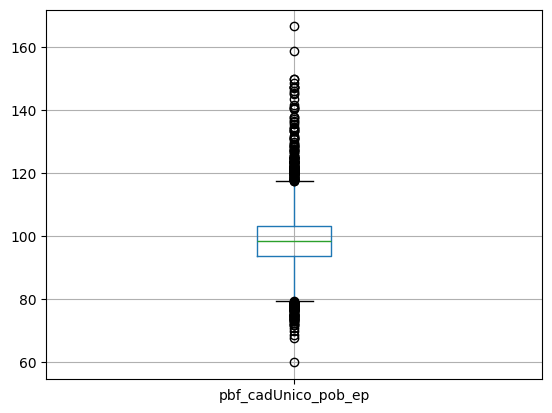

In [142]:
pd_pbf_cadUnico_semout[['pbf_cadUnico_pob_ep']].boxplot()

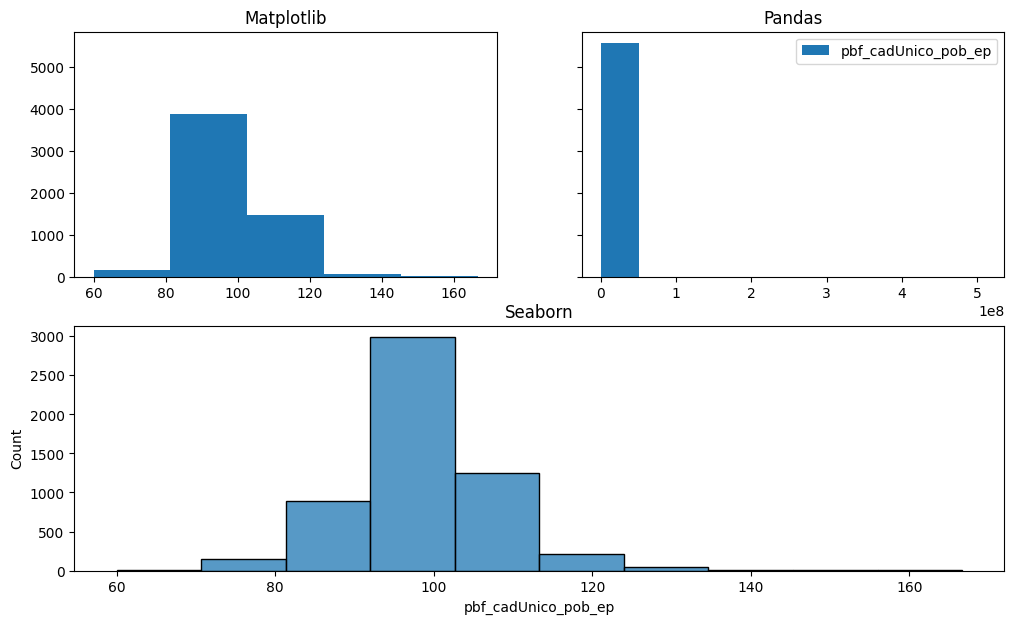

In [43]:
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title('Matplotlib')
ax1.hist(x=pd_pbf_cadUnico_semout['pbf_cadUnico_pob_ep'], bins=5);

ax2 = plt.subplot(2, 2, 2, sharey=ax1)
ax2.set_title('Pandas')
pd_pbf_cadUnico_semout.plot.hist(column='pbf_cadUnico_pob_ep', bins=10, ax=ax2);

ax3 = plt.subplot(2, 1, 2)
plt.title('Seaborn')

sns.histplot(data=pd_pbf_cadUnico_semout, x='pbf_cadUnico_pob_ep', 
             multiple='stack', bins=10, ax=ax3);
             

#### 2b) Discretizando ou criando classes

idades['faixa_etaria'] = pd.cut(idades['idade'], [18, 25, 35, 60, 100])


In [143]:
pd_pbf_cadUnico.columns

Index(['ibge_6', 'qtd_fam_beneficiadas', 'valor_repassado_bf',
       'cadunico_tot_fam', 'cadunico_fam_rpc_ate_meio_sm', 'cadunico_fam_pob',
       'cadunico_fam_ext_pob', 'cadunico_fam_pob_e_ext_pob', 'ibge_7', 'city',
       'pbf_cadUnico_pob_ep', 'pbf_cadUnico_tot'],
      dtype='object')

In [144]:
pd_indice_pbf_cadunico = pd_pbf_cadUnico[['ibge_6', 'qtd_fam_beneficiadas', 'cadunico_fam_rpc_ate_meio_sm', 'cadunico_fam_pob_e_ext_pob', 'ibge_7', 'city',
       'pbf_cadUnico_pob_ep', 'pbf_cadUnico_tot']]
pd_indice_pbf_cadunico.head()

,ibge_6,qtd_fam_beneficiadas,cadunico_fam_rpc_ate_meio_sm,cadunico_fam_pob_e_ext_pob,ibge_7,city,pbf_cadUnico_pob_ep,pbf_cadUnico_tot
0,110001,1755,2916,1547,1100015,Alta Floresta D''Oeste,113.445378,60.185185
1,110002,6398,11545,6152,1100023,Ariquemes,103.998700,55.417930
2,110003,318,596,271,1100031,Cabixi,117.343173,53.355705
3,110004,5904,10222,5769,1100049,Cacoal,102.340094,57.757777
4,110005,1085,1876,1085,1100056,Cerejeiras,100.000000,57.835821


In [145]:

pd_indice_pbf_cadunico['indice_bf'] = pd.cut(pd_indice_pbf_cadunico['pbf_cadUnico_pob_ep'], bins = [40, 80, 90, 100, 110, 400]) 

pd_indice_pbf_cadunico.head()



C:\Users\DELL\AppData\Local\Temp\ipykernel_17748\2970771831.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ibge_6,qtd_fam_beneficiadas,cadunico_fam_rpc_ate_meio_sm,cadunico_fam_pob_e_ext_pob,ibge_7,city,pbf_cadUnico_pob_ep,pbf_cadUnico_tot,indice_bf
0,110001,1755,2916,1547,1100015,Alta Floresta D''Oeste,113.445378,60.185185,"(110, 400]"
1,110002,6398,11545,6152,1100023,Ariquemes,103.998700,55.417930,"(100, 110]"
2,110003,318,596,271,1100031,Cabixi,117.343173,53.355705,"(110, 400]"
3,110004,5904,10222,5769,1100049,Cacoal,102.340094,57.757777,"(100, 110]"
4,110005,1085,1876,1085,1100056,Cerejeiras,100.000000,57.835821,"(90, 100]"


In [146]:
pd_indice_pbf_cadunico.columns

Index(['ibge_6', 'qtd_fam_beneficiadas', 'cadunico_fam_rpc_ate_meio_sm',
       'cadunico_fam_pob_e_ext_pob', 'ibge_7', 'city', 'pbf_cadUnico_pob_ep',
       'pbf_cadUnico_tot', 'indice_bf'],
      dtype='object')

In [147]:
indice_pbf_cadunico = pd_indice_pbf_cadunico['indice_bf'].value_counts()
indice_pbf_cadunico = pd.DataFrame(indice_pbf_cadunico)
indice_pbf_cadunico

,count
indice_bf,
"(90, 100]",2511
"(100, 110]",1867
"(80, 90]",632
"(110, 400]",447
"(40, 80]",113


In [148]:
indice_pbf_cadunico.columns

Index(['count'], dtype='object')

In [149]:
df_indice_pbf_cadunico = indice_pbf_cadunico.reset_index(drop=False).copy()

In [150]:
df_indice_pbf_cadunico.columns

Index(['indice_bf', 'count'], dtype='object')

In [151]:
df_indice_pbf_cadunico['Classe'] = [3, 4, 2, 5, 1]
df_indice_pbf_cadunico

,indice_bf,count,Classe
0,"(90, 100]",2511,3
1,"(100, 110]",1867,4
2,"(80, 90]",632,2
3,"(110, 400]",447,5
4,"(40, 80]",113,1


#### 2c) Visualizando em barras

C:\Users\DELL\AppData\Local\Temp\ipykernel_17748\3217857271.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



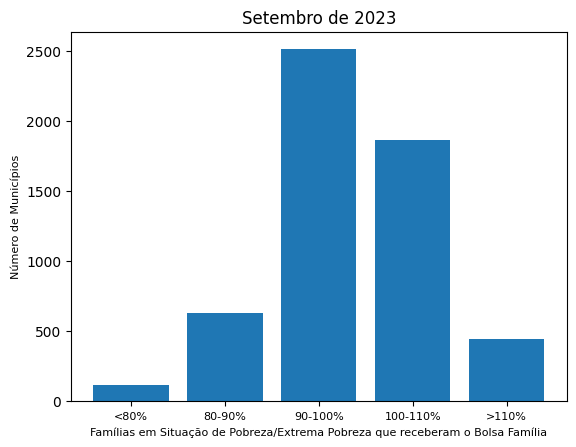

In [152]:
fig, ax = plt.subplots()

X = df_indice_pbf_cadunico['Classe']
Y = df_indice_pbf_cadunico['count']
ax.bar(X, Y)

plt.title('Setembro de 2023')

ax.set_xticklabels(['', '<80%', '80-90%', '90-100%', '100-110%', '>110%'], 
                   rotation=0, fontsize=8)

ax.set_xlabel('Famílias em Situação de Pobreza/Extrema Pobreza que receberam o Bolsa Família', fontsize=8)

ax.set_ylabel('Número de Municípios', fontsize=8)

plt.show()





#### 2d) Visualizando em mapas

pd_indice_pbf_cadunico.columns

Index(['ibge' - 6d, 'qtd_fam_beneficiadas', 'cadunico_fam_rpc_ate_meio_sm',
       'cadunico_fam_pob_e_ext_pob', 'id' 7d, 'city', 'pbf_cadUnico_pob_ep',
       'pbf_cadUnico_tot', 'indice_bf'],
      dtype='object')

In [153]:
# criar colunas latitude e longitude
municipio_geo = pd.read_json('data/municipios_georreferenciamento.json')
municipio_geo.head()

,codigo_ibge,latitude,longitude
0,5200050,-16.75730,-49.4412
1,3100104,-18.48310,-47.3916
2,5200100,-16.19700,-48.7057
3,3100203,-19.15510,-45.4444
4,1500107,-1.72183,-48.8788


In [161]:
# MESCLANDO as Bases para adicionar informações geográficas
pd_indice_pbf_cadunico_geo = pd.merge(pd_indice_pbf_cadunico, municipio_geo, left_on = ['ibge_7'], 
         right_on=['codigo_ibge'], how = 'outer')
pd_indice_pbf_cadunico_geo.drop(columns = 'codigo_ibge', inplace = True)
pd_indice_pbf_cadunico_geo.drop(columns = 'qtd_fam_beneficiadas', inplace = True)
pd_indice_pbf_cadunico_geo.drop(columns = 'cadunico_fam_rpc_ate_meio_sm', inplace = True)
pd_indice_pbf_cadunico_geo.drop(columns = 'cadunico_fam_pob_e_ext_pob', inplace = True)
pd_indice_pbf_cadunico_geo.drop(columns = 'pbf_cadUnico_tot', inplace = True)
pd_indice_pbf_cadunico_geo.rename(columns = {'city':'municipio'}, inplace=True)
pd_indice_pbf_cadunico_geo

,ibge_6,ibge_7,municipio,pbf_cadUnico_pob_ep,indice_bf,latitude,longitude
0,110001,1100015,Alta Floresta D''Oeste,113.445378,"(110, 400]",-11.92830,-61.9953
1,110002,1100023,Ariquemes,103.998700,"(100, 110]",-9.90571,-63.0325
2,110003,1100031,Cabixi,117.343173,"(110, 400]",-13.49450,-60.5520
3,110004,1100049,Cacoal,102.340094,"(100, 110]",-11.43430,-61.4562
4,110005,1100056,Cerejeiras,100.000000,"(90, 100]",-13.18700,-60.8168
...,...,...,...,...,...,...,...
5565,522200,5222005,Vianópolis,100.094340,"(100, 110]",-16.74050,-48.5159
5566,522205,5222054,Vicentinópolis,99.479167,"(90, 100]",-17.73220,-49.8047
5567,522220,5222203,Vila Boa,101.676829,"(100, 110]",-15.03870,-47.0520
5568,522230,5222302,Vila Propício,97.311140,"(90, 100]",-15.45420,-48.8819


In [81]:
"""
workaround para contornar a exceção: \
    SSLError: [SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] \
    unsafe legacy renegotiation disabled (_ssl.c:997)

é possível considerando que estamos tratando apenas de dados públicos
import json
import requests, urllib3, ssl
"""

class CustomHttpAdapter (requests.adapters.HTTPAdapter):
    def __init__(self, ssl_context=None, **kwargs):
        self.ssl_context = ssl_context
        super().__init__(**kwargs)
    def init_poolmanager(self, connections, maxsize, block=False):
        self.poolmanager = urllib3.poolmanager.PoolManager(
            num_pools=connections, maxsize=maxsize,
            block=block, ssl_context=self.ssl_context)

def get_legacy_session():
    ctx = ssl.create_default_context(ssl.Purpose.SERVER_AUTH)
    ctx.options |= 0x4  # OP_LEGACY_SERVER_CONNECT
    session = requests.session()
    session.mount('https://', CustomHttpAdapter(ctx))
    return session

#def access_api_and_save(url, filename):
#    response = get_legacy_session().get(url)
#
#    if response.status_code == 200:
#        content = response.json()
#        
#        folderpath = build_path()
#        filepath = os.path.join(folderpath, filename)
#        with open(filepath, mode='w') as jsonfile:
#            json.dump(content, jsonfile)

In [162]:
url = 'https://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=maxima&intrarregiao=municipio'

response = get_legacy_session().get(url)
if response.status_code == 200:
    content = response.json() 


In [163]:
geojson = rewind(content, rfc7946=False)

In [93]:
#fig = px.choropleth(pd_indice_pbf_cadunico_geo, geojson=geojson, color="Bergeron",
#                    locations="district", featureidkey="properties.district",
#                    projection="mercator"
#                   )
#fig.update_geos(fitbounds="locations", visible=False)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()
#
#fig = px.choropleth(), geojson=geojson,
#                        scope='south america',
#                        color='percento_familia',
#                        color_continuous_scale="Reds",
#                        locations='id',
#                        featureidkey='properties.codarea',
#                        hover_name='ibge'
#
#fig.show()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3273079065.py, line 3)

#### 2e) Testando outros indices

In [164]:
pd_indice_pbf_cadunico_geo
pd_indice_pbf_cadunico_geo['indice_bf_10c'] = pd.cut(pd_indice_pbf_cadunico['pbf_cadUnico_pob_ep'], bins = [40, 80, 85, 90, 95, 100, 400]) 
pd_indice_pbf_cadunico_geo.head()

,ibge_6,ibge_7,municipio,pbf_cadUnico_pob_ep,indice_bf,latitude,longitude,indice_bf_10c
0,110001,1100015,Alta Floresta D''Oeste,113.445378,"(110, 400]",-11.92830,-61.9953,"(100, 400]"
1,110002,1100023,Ariquemes,103.998700,"(100, 110]",-9.90571,-63.0325,"(100, 400]"
2,110003,1100031,Cabixi,117.343173,"(110, 400]",-13.49450,-60.5520,"(100, 400]"
3,110004,1100049,Cacoal,102.340094,"(100, 110]",-11.43430,-61.4562,"(100, 400]"
4,110005,1100056,Cerejeiras,100.000000,"(90, 100]",-13.18700,-60.8168,"(95, 100]"


In [168]:
indice_pbf_cadunico_10c = pd_indice_pbf_cadunico_geo['indice_bf_10c'].value_counts()
indice_pbf_cadunico_10c = pd.DataFrame(indice_pbf_cadunico_10c)
df_indice_pbf_cadunico_10c = indice_pbf_cadunico_10c.reset_index(drop=False).copy()
df_indice_pbf_cadunico_10c

,indice_bf_10c,count
0,"(100, 400]",2314
1,"(95, 100]",1564
2,"(90, 95]",947
3,"(85, 90]",427
4,"(80, 85]",205
5,"(40, 80]",113


In [170]:
df_indice_pbf_cadunico_10c['Classe'] = [6, 5, 4, 3, 2, 1]
df_indice_pbf_cadunico_10c

,indice_bf_10c,count,Classe
0,"(100, 400]",2314,6
1,"(95, 100]",1564,5
2,"(90, 95]",947,4
3,"(85, 90]",427,3
4,"(80, 85]",205,2
5,"(40, 80]",113,1


C:\Users\DELL\AppData\Local\Temp\ipykernel_17748\2319396496.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



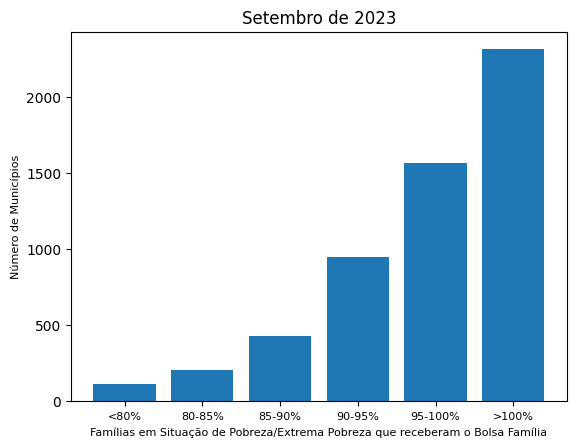

In [172]:
fig10c, ax = plt.subplots()

X = df_indice_pbf_cadunico_10c['Classe']
Y = df_indice_pbf_cadunico_10c['count']
ax.bar(X, Y)

plt.title('Setembro de 2023')

ax.set_xticklabels(['', '<80%', '80-85%', '85-90%', '90-95%', '95-100%', '>100%'], 
                   rotation=0, fontsize=8)

ax.set_xlabel('Famílias em Situação de Pobreza/Extrema Pobreza que receberam o Bolsa Família', fontsize=8)

ax.set_ylabel('Número de Municípios', fontsize=8)

plt.show()

